
# Spark-ocr demo for financial tabular data extraction


## Set up environment

In [ ]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11/"
AWS_ACCESS_KEY_ID = ""
AWS_SECRET_ACCESS_KEY = ""

import os
os.environ['JSL_OCR_LICENSE'] = license
os.environ["AWS_ACCESS_KEY_ID"] = AWS_ACCESS_KEY_ID
os.environ["AWS_SECRET_ACCESS_KEY"] = AWS_SECRET_ACCESS_KEY

## Run Spark-ocr

In [ ]:
from sparkocr import start
from pyspark import SparkConf

spark = start(jar_path = spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark OCR version: 3.12.0



## Load sample pdf documents and expand pages on rows

In [ ]:
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import display_images, display_tables
from pyspark.ml import PipelineModel

binary_to_image = BinaryToImage()

# Detect tables on the page using pretrained model
# It can be finetuned for have more accurate results for more specific documents
table_detector = ImageTableDetector.pretrained("general_model_table_detection_v2", "en", "clinical/ocr")
table_detector.setInputCol("image")
table_detector.setOutputCol("region")

# Draw detected region's with table to the page
draw_regions = ImageDrawRegions()
draw_regions.setInputCol("image")
draw_regions.setInputRegionsCol("region")
draw_regions.setOutputCol("image_with_regions")
draw_regions.setRectColor(Color.red)

# Extract table regions to separate images
splitter = ImageSplitRegions()
splitter.setInputCol("image")
splitter.setInputRegionsCol("region")
splitter.setOutputCol("table_image")
splitter.setDropCols("image")

scaler = ImageScaler()
scaler.setInputCol("table_image")
scaler.setOutputCol("transformed_image")
scaler.setScaleFactor(2.5)

# Detect cells on the table image
cell_detector = ImageTableCellDetector()
cell_detector.setInputCol("transformed_image")
cell_detector.setOutputCol("cells")
cell_detector.setAlgoType("morphops")
cell_detector.setDrawDetectedLines(True)

# Extract text from the detected cells 
table_recognition = ImageCellsToTextTable()
table_recognition.setInputCol("transformed_image")
table_recognition.setCellsCol('cells')
table_recognition.setMargin(3)
table_recognition.setStrip(True)
table_recognition.setOutputCol('table')


pipeline_table = PipelineModel(stages=[
    binary_to_image,
    table_detector,
    draw_regions,
    splitter,
    scaler,
    cell_detector,
    table_recognition,

])

11:22:54, INFO NumExpr defaulting to 4 threads.


general_model_table_detection_v2 download started this may take some time.
Approximate size to download 264.7 MB


We will show processing of each image sample one by one though usually they are processed together.

### 1


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10002.jpg
    Resolution: 0 dpi
    Width: 794 px
    Height: 1123 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


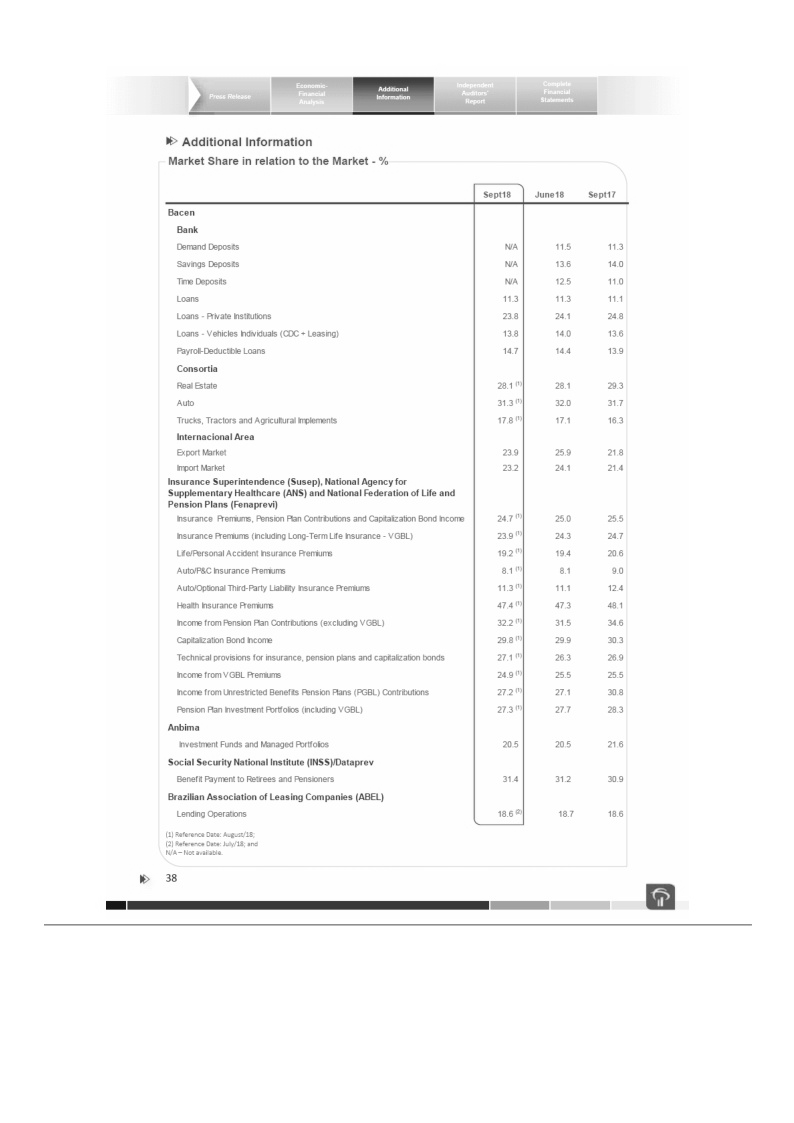

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10002.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

Display found tables

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10002.jpg
Page:     0
Table:    0


,col0,col1,col2,col3
0,,,june 18,Sept?
1,Bacen,po,,ae
2,Bank,,,
3,Demand Deposts,wal,15,11.3
4,Savings Deposits,wal,136,140
5,‘Time Deposits,} wal,125,11.0
6,Loans,113],13,wW41
7,Loans - Private insthutions,238,244,
8,Loans - Vehicles Individuals (CDC + Leasing),} 138],140,13.6
9,Payrot- Deductible Loans,147],44,139


### 2


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10043.jpg
    Resolution: 0 dpi
    Width: 1196 px
    Height: 1685 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


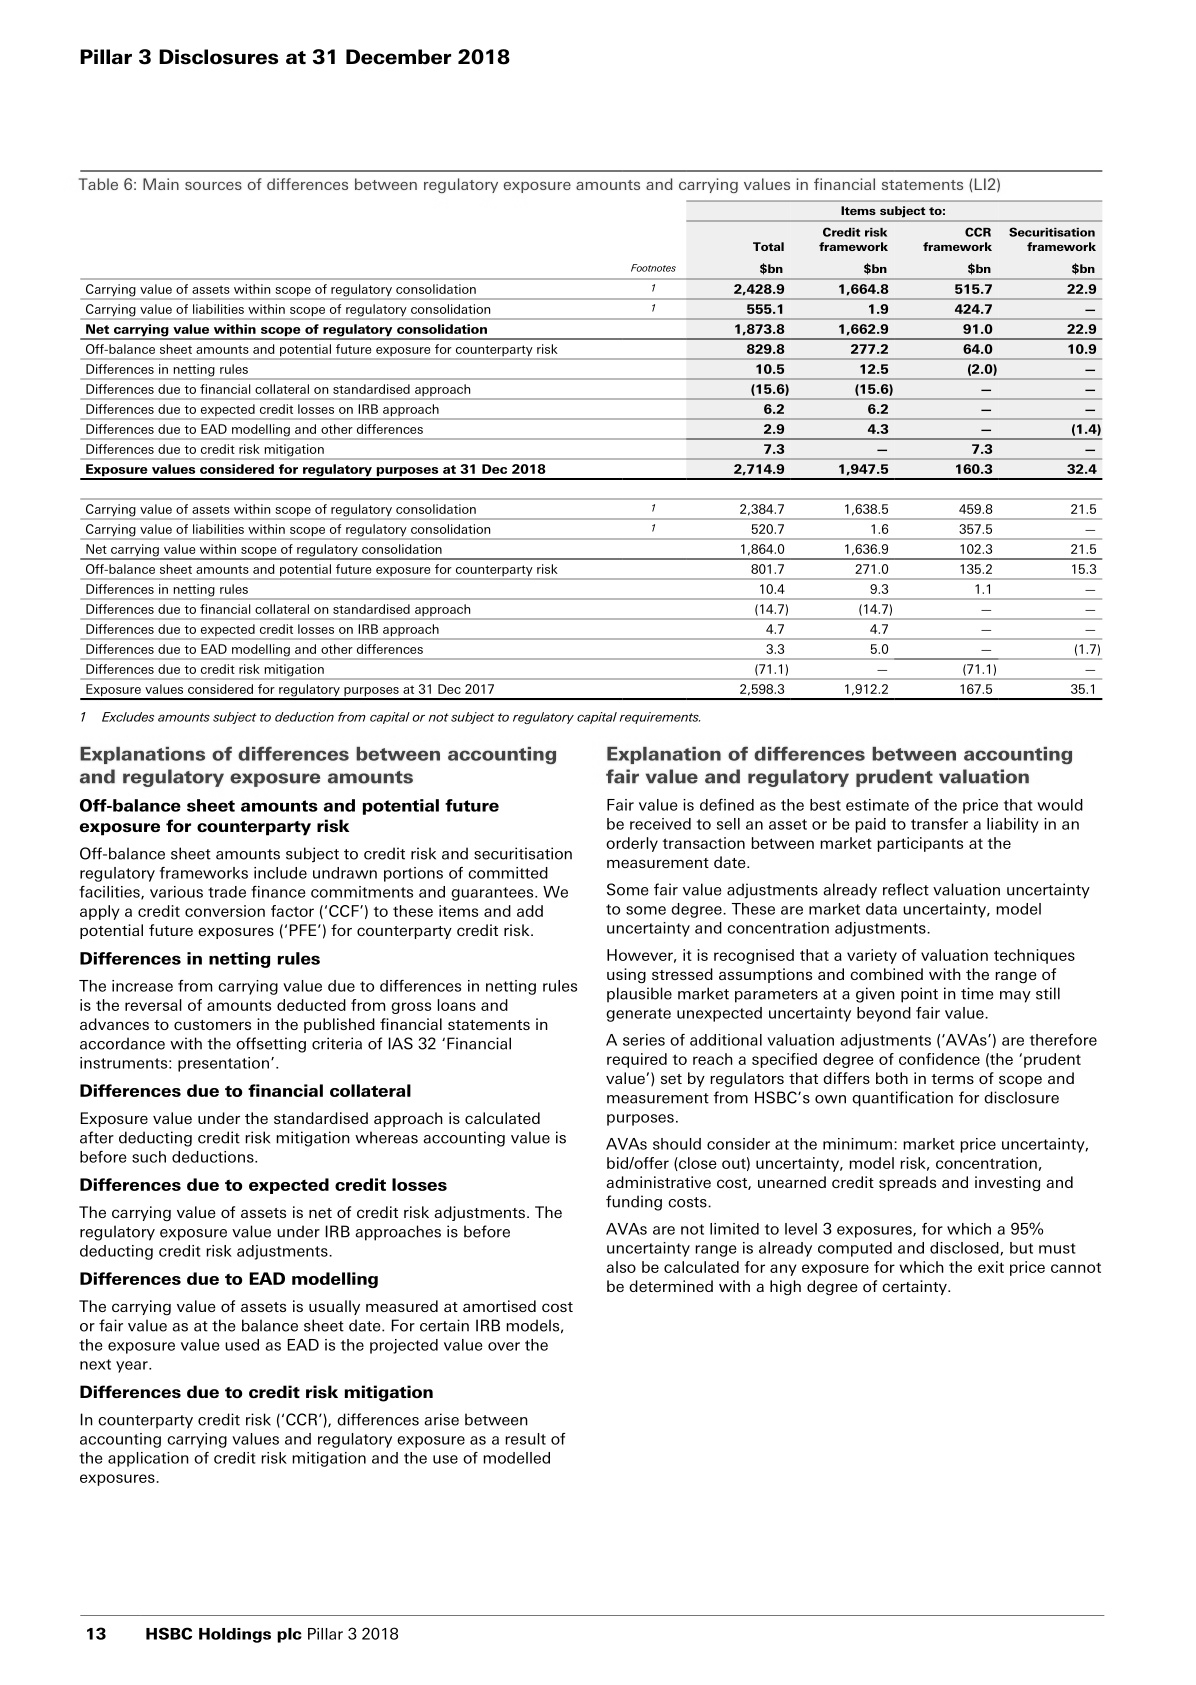

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10043.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10043.jpg
Page:     0
Table:    0


,col0,col1,col2,col3,col4,col5,col6
0,[able 6: Main sources of differences between r...,amounts and ca,rrying values i1,) financial sta’,emen,ts (LI2),
1,"ats i, bs",,,Items subj,ect to:,,
2,,,,Credit risk,,CCR Sec,uritisation
3,,,Total,framework,fran,ework f,ramework
4,,Footnotes,$bn,$bn,,$bn,$bn
5,Carrying value of assets within scope of regul...,1,"2,428.9","1,664.8",,515.7,22.9
6,Carrying value of liabilities within scope of ...,1,555.1,1.9,,424.7,
7,Net carrying value within scope of regulatory ...,,"1,873.8","1,662.9",,91.0,22.9
8,Off-balance sheet amounts and potential future...,,829.8,277.2,,64.0,10.9
9,Differences in netting rules,,10.5,12.5,,(2.0),


### 3


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10048.jpg
    Resolution: 0 dpi
    Width: 816 px
    Height: 1056 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


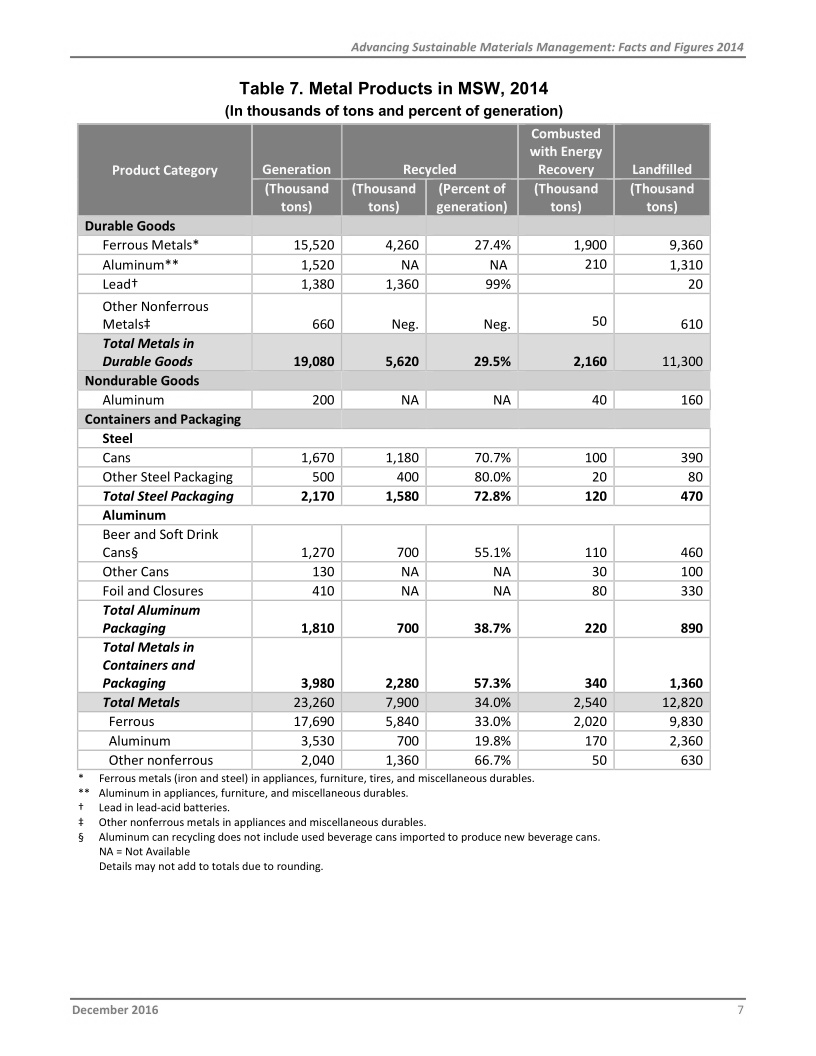

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10048.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10048.jpg
Page:     0
Table:    0


,col0,col1,col2,col3,col4,col5,col6
0,",",eT,nn ie,,oT,Combusted /,
1,,,,,,with Energy,
2,,Product Category E,Generation,Clara:,,lee a /,andfilled
3,,,While ee,fhousand (,ercent of,(Thousand,Thousand
4,@,ee,beelit yd],bel ird] / ri,:neration) /,tons) /,tons)
5,Di,irable Goods,,,,,
6,,Ferrous Metals*,"15,520","4,260",27.4%,"1,900","9,360"
7,,Aluminum**,"1,520",NA,NA,210,"1,310"
8,},Leadt,"1,380","1,360",99%,ee,20
9,,Other Nonferrous,,,,,


### 4


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10096.jpg
    Resolution: 0 dpi
    Width: 1190 px
    Height: 1588 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


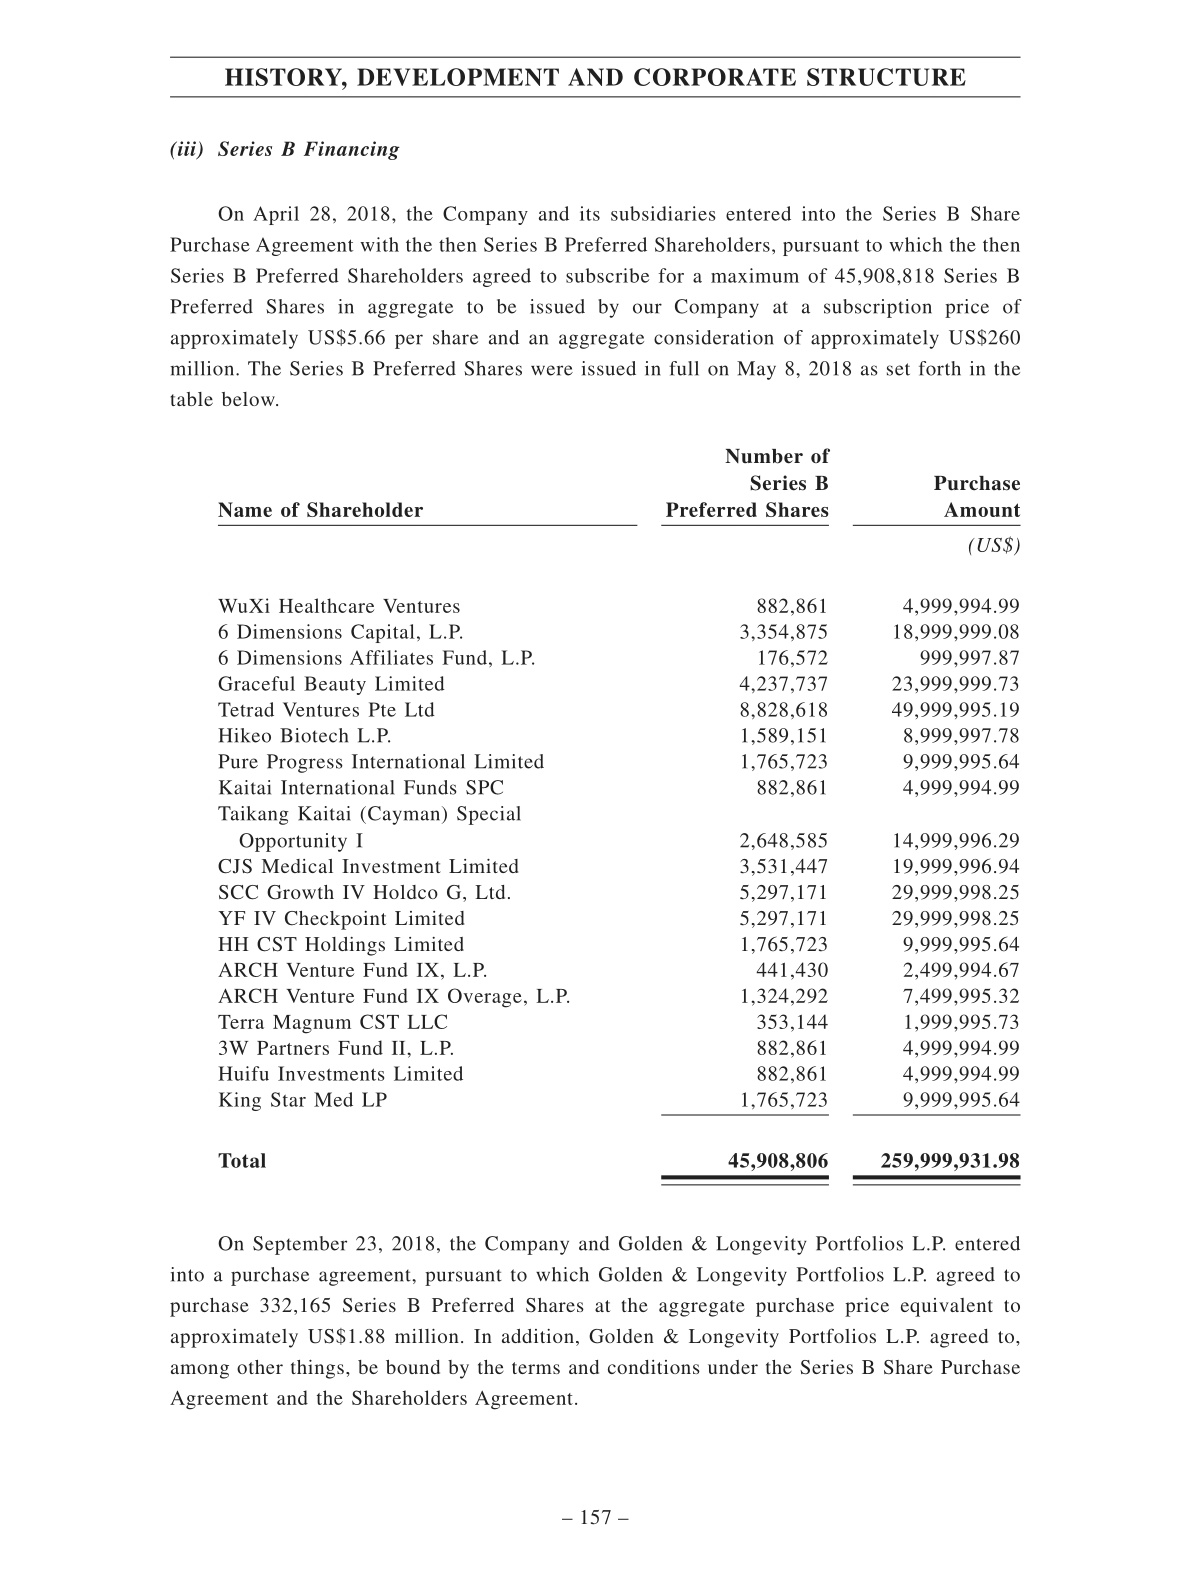

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10096.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10096.jpg
Page:     0
Table:    0


,col0,col1,col2
0,,Number of,
1,,Series B,Purchase
2,Name of Shareholder,' Preferred Shares :,Amount
3,,,(US$)
4,WuXi Healthcare Ventures,882.861,"4,999 994.99"
5,"6 Dimensions Capital, L.P.","3,354,875","18,999,999.08"
6,"6 Dimensions Affiliates Fund, L.P.","176,572","999,997.87"
7,Graceful Beauty Limited,"4,237,737","23,999,999 .73"
8,Tetrad Ventures Pte Ltd,"8,828,618","49,999,995.19"
9,Hikeo Biotech L.P.,"1,589,151","8,999 997.78"


### 5


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10104.jpg
    Resolution: 0 dpi
    Width: 1224 px
    Height: 1584 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


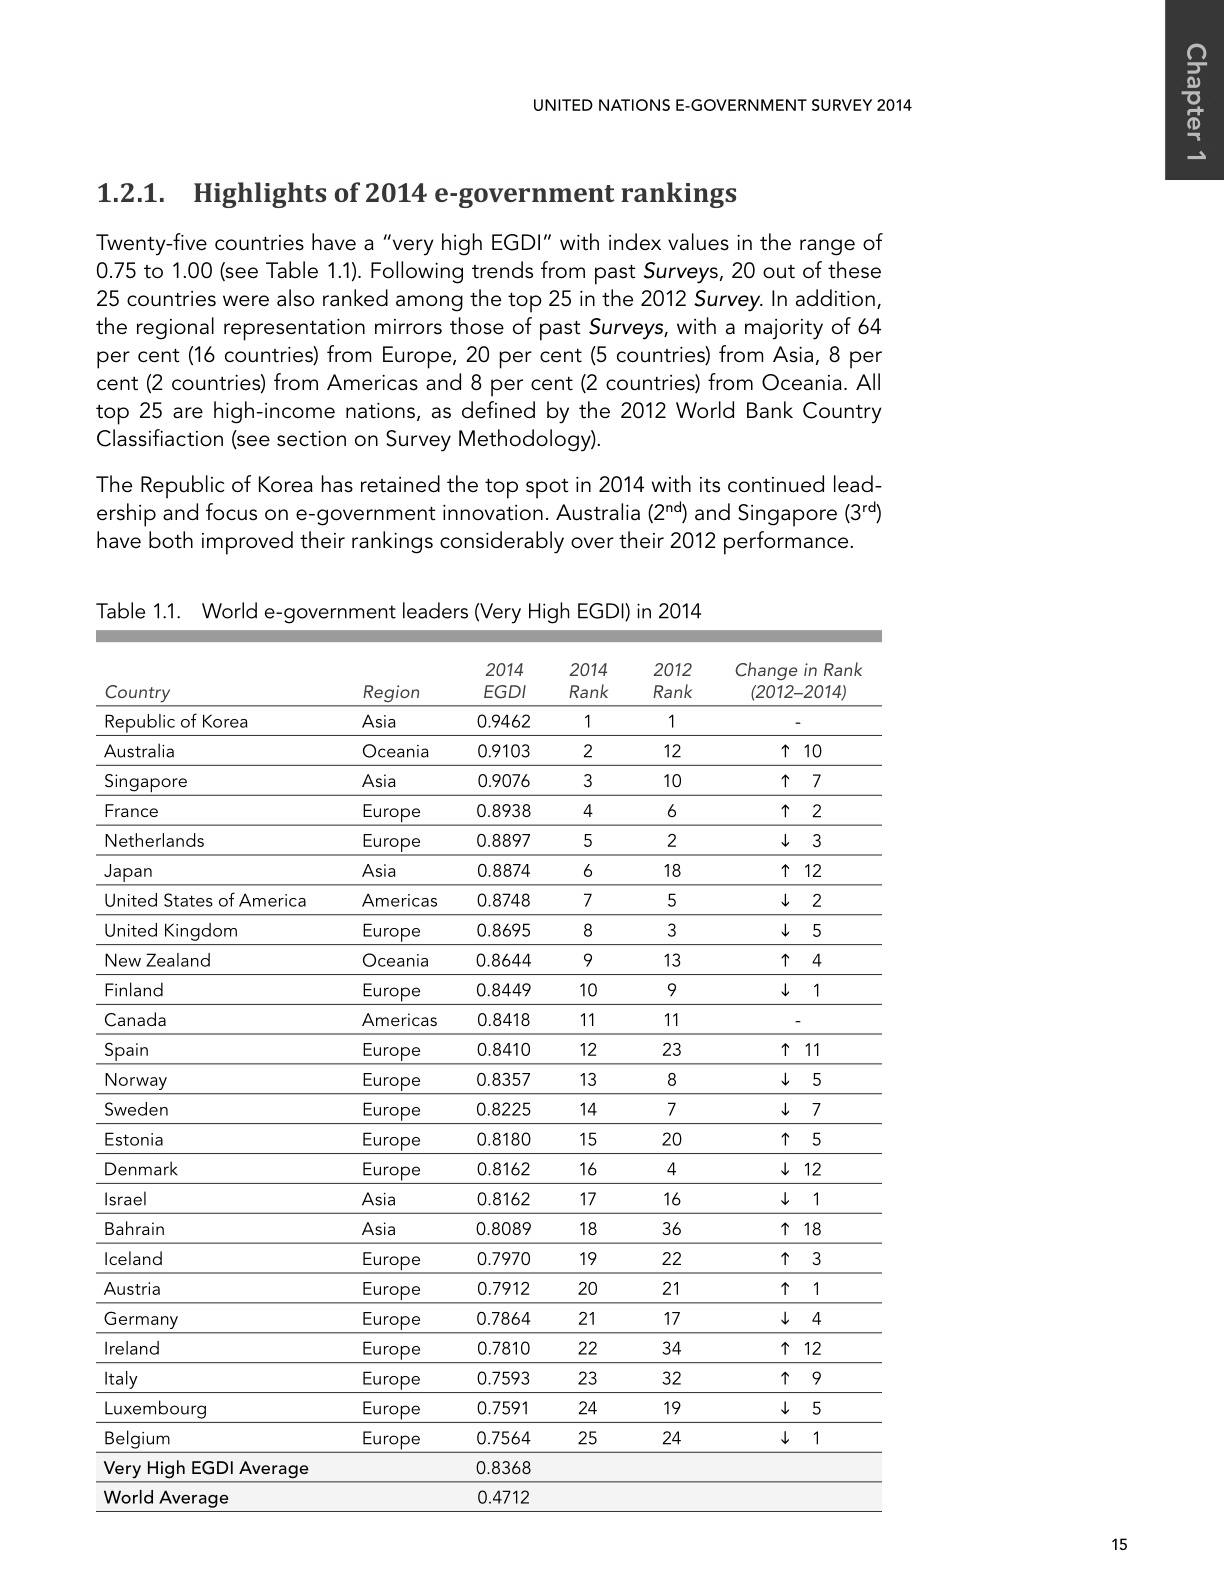

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10104.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10104.jpg
Page:     0
Table:    0


,col0,col1,col2,col3,col4,col5
0,,,2014,2014,2012,Change in Rank
1,Country,Region,EGDI,Rank,Rank,(2012-2014)
2,Republic of Korea,Asia,0.9462,1,1,
3,Australia,Oceania,0.9103,2,12,ne)
4,Singapore,Asia,0.9076,3,10,' #7
5,France,Europe,0.8938,4,6,+ 2
6,Netherlands,Europe,0.8897,5,2,4 3
7,Japan,Asia,0.8874,6,18,T 12
8,United States of Americz,Americas,0.8748,7,5,Lb 2
9,United Kingdom,Europe,0.8695,8,3,45


### 6


    Image #0:
    Origin: file:/content/TablesSamples/cTDaR_t10115.jpg
    Resolution: 0 dpi
    Width: 1224 px
    Height: 1584 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


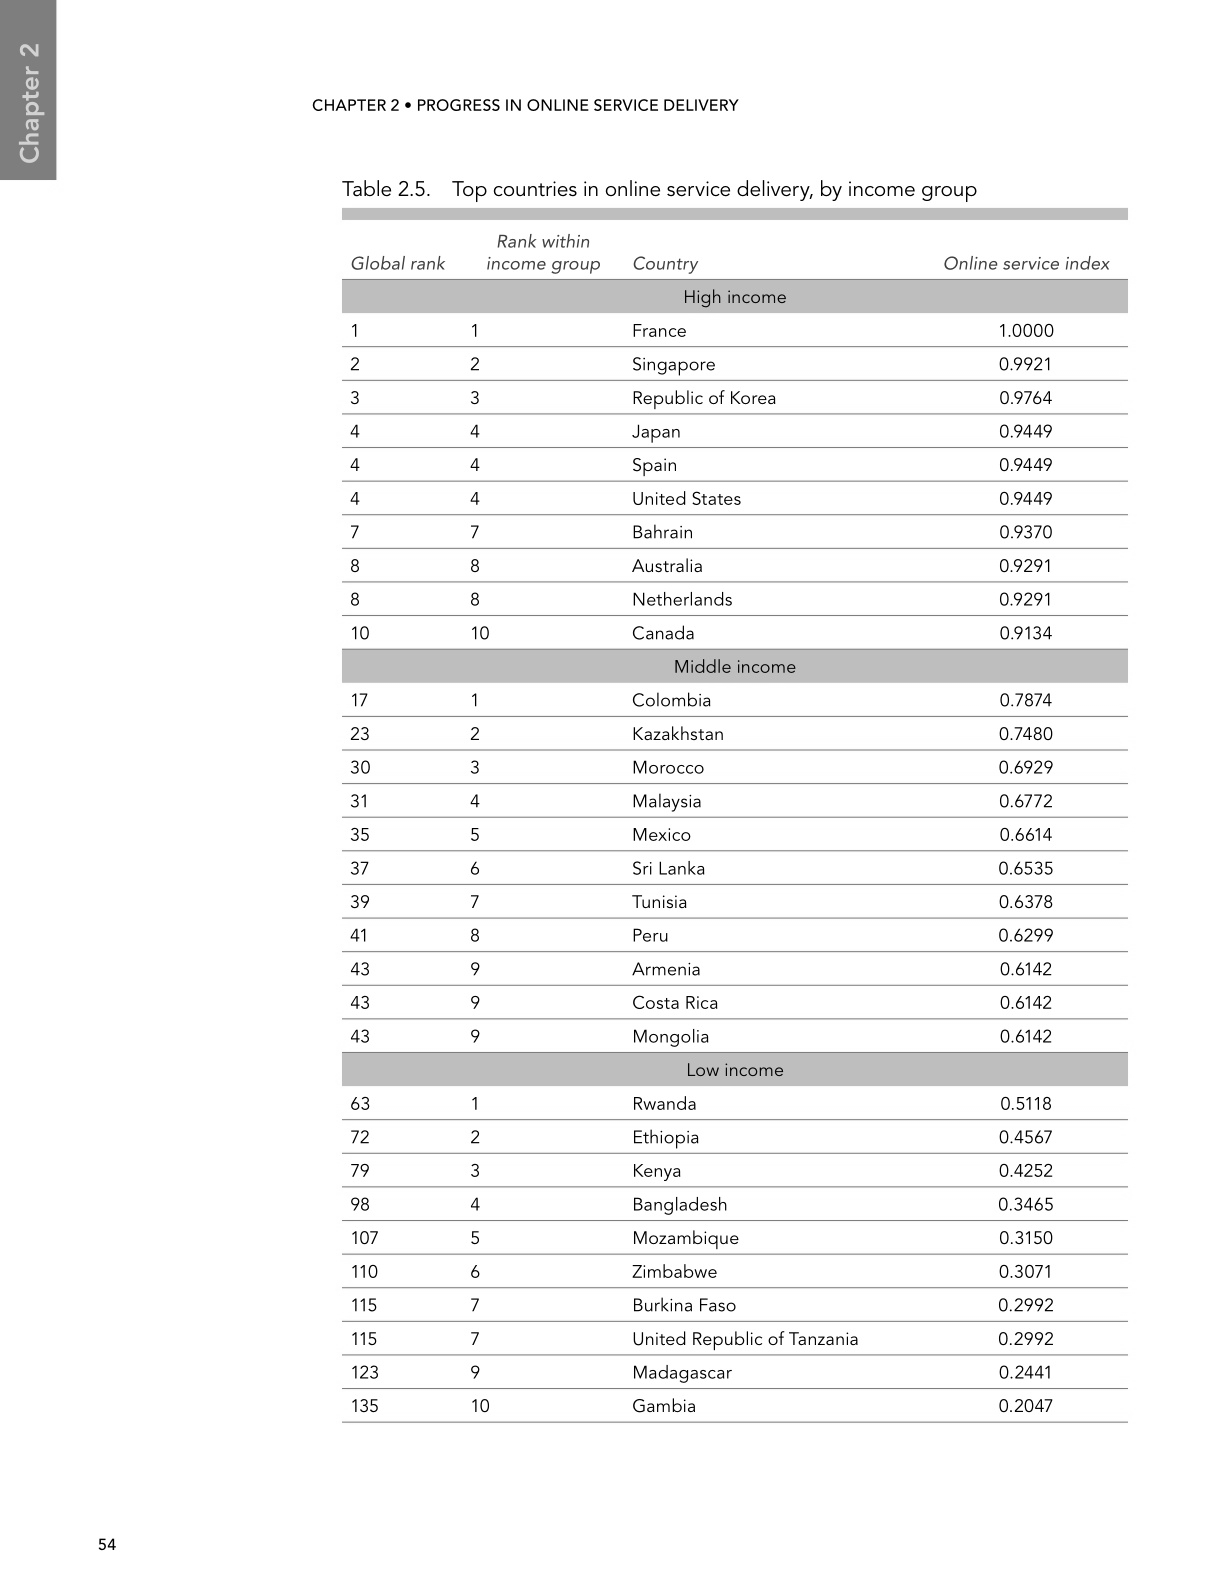

In [ ]:
imagePath = "./TablesSamples/cTDaR_t10115.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(binary_to_image.transform(image_df), "image")

In [ ]:
tables_results = pipeline_table.transform(image_df).cache()
display_tables(tables_results)

Filename: cTDaR_t10115.jpg
Page:     0
Table:    0


,col0,col1,col2,col3
0,,Rank w,ithin,oa oo
1,"Global rz>""",nk income LL,yroup CountryLLL,Online service indexLL&L ll
2,,,,
3,1,1,France,1.0000
4,2,2,Singapore,0.9921
5,3,3,Republic of Korea,0.9764
6,4,4,Japan,0.9449
7,4,4,Spain,0.9449
8,4,4,United States,0.9449
9,7,7,Bahrain,0.9370
